# P06: The Classification Pipeline
This practical is best done only after you have gone through the lectures *L04:The Classification Pipeline*.

0. [The MNIST dataset](#0.The-MNIST-dataset)
1. [Get and explore MNIST](#1.-Get-and-explore-MNIST)
2. [Binary Classification](#2.-Binary-Classification)
   1. [Training a binary classifier using SGDClassifier](#2.1-Training-a-binary-classifier-using-SGDClassifier)
      1. [Performance measure: Accuracy](#2.1.1-Performance-measure:-Accuracy)
      2. [Performance Measure: Confusion Matrix](#2.1.2-Performance-Measure:-Confusion-Matrix)
      3. [Performance Measure: Precision, Recall and F1 Score](#2.1.3-Performance-Measure:-Precision,-Recall-and-F1-Score)
      4. [Performance Measure: Precision-Recall curve](#2.1.4-Performance-Measure:-Precision-Recall-curve)
      5. [Performance measure: ROC curve](#2.1.5-Performance-measure:-ROC-curve)
   2. [Evaluate Model on Test Set](#2.2-Evaluate-model-on-test-set)
3. [(Exercise) Comparing Classifiers: SGDClassifier vs RandomForestClassifier](#3.-Exercise:-Comparing-Classifiers)
      

## 0.The MNIST dataset:

The MNIST database of handwriten digits written by high school students and employees of US Census Bureau. It is a good database for people who want to learn machine learning and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.

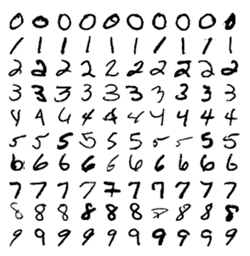

It has a total of 70,000 small images of digits where **60,000** are for *training* and **10,000** for *testing*. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

np.random.seed(42) # to ensure we have consistent results

## 1. Get and explore MNIST

### Load and visualize the dataset

First, we load the MNIST data set. Scikit-Learn provides many helper function to download popular datasets and MNIST is one of them. The following code fetch the MNIST dataset from the web and store the images as `X` and the labels as `y`. 


In [2]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, data_home = './') 

C:\Users\UTAR\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
# convert X, y to numpy arrays (for newer version of sklearn)
if isinstance(X, pd.DataFrame):
    X = X.values
    
if isinstance(y, pd.Series):
    y = y.values

**`X`** stores all the digit images in MNIST. There are 70,000 rows and 784 columns in `X`. Each *row* represents a sample (an image) in MNIST. So, each image in mnist is a vector of size 784 which corresponds to 28x28 pixels (28 x 28 = 784). Each pixel has a value between 0 (black) and 255 (white). 

**`y`** contains the labels for corresponding images, stored as String '0' to '9'.   

The following code displays the shape of `X` and `y`.

In [4]:
# Exercise: Your code here
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


The following code shows the frequencies of all labels in mnist. We can see that the distribution of the digits in the dataset is quite uniform.

In [5]:
print('label  frequency')
# Exercise: Your code here
pd.Series(y).value_counts()

label  frequency


1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
dtype: int64

The following code display one sample from the dataset. First, we reshape the selected sample's feature vector from (784,) to (28, 28). Then, we invoke matplotlib command `imshow` to show the image.

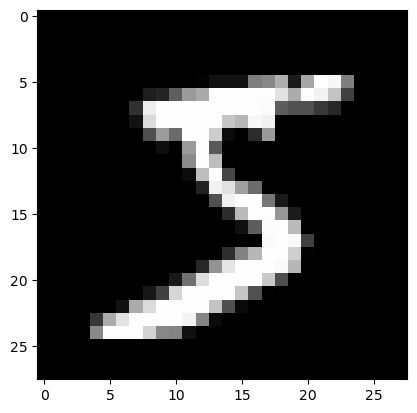

In [6]:
def display(one_digit):
    one_digit_image = one_digit.reshape(28,28)
    plt.imshow (one_digit_image, cmap = matplotlib.cm.gray, interpolation = 'nearest')
    
one_digit = X[0]  # change number (0~69999) to show other images
display(one_digit)

In [7]:
X[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

### Data preparation

#### Split dataset into training and testing set

First, splits the dataset (`X`, `y`) into the training set (`X_train`,`y_train`) which stores the first 60,000 samples and testing set (`X_test`,`y_test`) which stores the last 10,000 samples. 

In [10]:
# Split X, y into X_train, y_train (60000 samples) and X_test, y_test (10000 samples)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

print('Shape of X_train:', X_train.shape, ' y_train:', y_train.shape)
print('Shape of X_test:', X_test.shape, ' y_test:', y_test.shape)

Shape of X_train: (60000, 784)  y_train: (60000,)
Shape of X_test: (10000, 784)  y_test: (10000,)


Let's show the labels of the first 10 training samples.

In [11]:
print('Labels of first 10 training samples:', y_train[:10])  # show the first 10 samples

Labels of first 10 training samples: ['5', '0', '4', '1', '9', '2', '1', '3', '1', '4']
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


## 2. Binary Classification

In this section, we learn how to build a **binary classifier** that is able to distinguish between just two classes, 5 and not-5 images. 

The following code create the targeted variable `y_train_5` and `y_test_5` which is `True` only for samples with digit 5 and `False` otherwise.  

In [12]:
# Exercise: Your code here
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')


Let's look at the first 20 labels for `y_train_5`

In [13]:
print('y_train : y_train_5')
for i in range(20):
    print(y_train[i], ' : ', y_train_5[i])

y_train : y_train_5
5  :  True
0  :  False
4  :  False
1  :  False
9  :  False
2  :  False
1  :  False
3  :  False
1  :  False
4  :  False
3  :  False
5  :  True
3  :  False
6  :  False
1  :  False
7  :  False
2  :  False
8  :  False
6  :  False
9  :  False


## 2.1 Training a binary classifier using SGDClassifier

#### Training a binary model

sNow, let's pick a classifier and train it. In the following we, shall use a **LINEAR CLASSIFIER** called [SGDClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html). This classifier is trained using **Stochastic Gradient Descent** which has the advantage of being capable of handling very large datasets efficiently. The following code creates an `SGDClassifier`and train it on the whole training set.

In [17]:
from sklearn.linear_model import SGDClassifier

# Exercise: create a SGDClassifier(random_state = 42, max_iter = 5, tol = None) 
sgd_clf = SGDClassifier(random_state = 42, max_iter = 5, tol = None)

# sgd_clf = ?

# Train using the training set
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(max_iter=5, random_state=42, tol=None)

#### Performing predictions 

Now, we can use it to detect image of number 5

In [18]:
# Exercise: use the trained classifier to predict on training set
# y_pred = (code here)
y_pred = sgd_clf.predict(X_train)

Let's look at our detection result for some randomly generated samples

In [50]:
def peek_results(actual, predicted, num = 20):
    print('actual |  Predicted')
    print('------------------')
    for i in range(num):
        sel = np.random.randint(0, len(y_train))
        print(actual[sel], ' |', predicted[sel])
        
peek_results(y_train_5, y_pred)

actual |  Predicted
------------------
False  | False
False  | False
True  | True
False  | False
False  | False
True  | True
False  | False
False  | False
False  | False
False  | False
False  | False
False  | False
True  | True
False  | False
False  | False
False  | False
False  | False
False  | False
False  | False
False  | False


### 2.1.1 Performance measure: Accuracy

Having built our digit-5 classifier, we want to see how well our model perform. Evaluating a classifier is often trickier than evaluating a regressor. We shall use different performance measure to evaluate our system.

First, we use the accuracy measure to evaluate the performance of the system. 

<center>$\text{Accuracy} = \frac{\text{#Correctly predicted}}{\text{#All samples}}$</center>

This can be done easily through the command [accuracy_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html). All we need to do is to provide the vector of actual labels (`y_train_5`) and the corresponding vector of predicted labels (`y_pred`). 

The following code computes the training accuracy. We get a very high accuracy!

Ans: 
```
Training accuracy: 0.9696
```

In [53]:
from sklearn.metrics import accuracy_score

# Exercise: compute accuracy using accuracy_score and show the result
acc = accuracy_score(y_train_5, y_pred)
print(f'Training accuracy: {acc*100:.4f}%')

Training accuracy: 96.9583%


#### Measuring training accuracy using Cross-Validation

A good way to evaluate a model is to use cross-validation. Remember that K-fold cross-validation means splitting the training set into K-folds, then making predictions and evaluating them on each fold using a model trained on the remaining folds.

Let's use [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to evaluate our `SGDClassifier` model using K-fold cross-validation. 

The following code compute and show the validation accuracies of our model using 3-fold cross-validation.  Set the scoring = 'accuracy' 

Ans: 
```
array([0.9633 , 0.95695, 0.9146 ])
```

In [56]:
from sklearn.model_selection import cross_val_score

# Exercise: compute 3-fold cross-validation accuracy and show the result
# k_scores = (code here)

k_scores = cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = 'accuracy')
k_scores

array([0.9633 , 0.95695, 0.9146 ])

**Notes**: the function `cross_val_score` **will not update our classifier `sgd_clf` with any of the fitted models**. This is because `cross_val_score` makes a copy of `sgd_clf` and train using only the copy version. Consequently, none of the models built are saved.

#### Problems with accuracy

Both cross-validated or non-cross-validated version of accuracy scores reported a *misleadingly high* accuracy for our training set. The reason is because the our dataset is *skewed*. There are only around 10% digit-5 images in the dataset.

So, even if we classify *all* digit-5 images wrongly, the accuracy will still be as high as 0.90.

This shows that the accuracy metric can be misleading when the dataset is skewed. The accuracy measure is not suitable for this dataset. 

In [57]:
from sklearn.metrics import accuracy_score

y_train_pred = sgd_clf.predict(X_train)  # make sure sgd_clf has been trained
print('Accuracy using prediction values:', accuracy_score(y_train_5, y_train_pred))

y_train_allfalse = np.zeros(len(y_train_5), dtype=bool)
print('Accuracy using prediction values:', accuracy_score(y_train_5, y_train_allfalse))

Accuracy using prediction values: 0.9695833333333334
Accuracy using prediction values: 0.90965


### 2.1.2 Performance Measure: Confusion Matrix

A better way to evaluate the result is through the confusion matrix. For binary classification, we split the result into four quadrants.
1. **TN** (true negatives) are the number of negative samples that are correctly predicted as negative
2. **FP** (false positives) are the number of negative samples that are falsely predicted as positive
3. **TP** (true positives) are the number of positive samples that are correctly predicted as positive
4. **FN** (false negatives) are the number of positive samples that are falsely predicted as negative

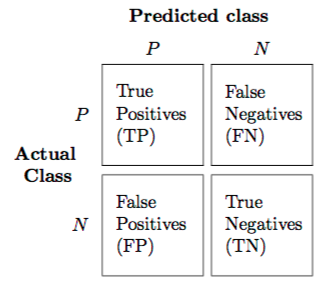

The following steps compute the confusion matrix for our classifier. First, we need to get the prediction results for all training samples. 
* One common way to do so is to build a model using the whole training set and then use the model to predict the labels of the training set itself. 
* We can also use **cross-validation** to predict the labels of the training set through the command [cross_val_predict](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html). 

#### Perform cross-validated prediction

Let's  try the second approach where we use [cross_val_predict](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html) to perform cross-validated predictions for all training samples. 
<br>For example, for a 3 fold cross-validation, the function performs the following: 
1. Train on the samples in fold2 and fold3, predict the labels of samples in fold 1
2. Train on the samples in fold1 and fold3, predict the labels of samples in fold 2
3. Train on the samples in fold1 and fold2, predict the labels of samples in fold 3

Combining the prediction result from all 3 folds, we get the cross-validated prediction for all samples in the whole training set.

Note that the function `cross_val_predict` **will not update our classifier `sgd_clf` with any of the fitted models**. This is because `cross_val_predict` makes a copy of `sgd_clf` and train using only the copy version. Consequently, none of the models built are saved.

The following code shows how to use 3-fold cross validation to predict the label for all training samples.

In [58]:
from sklearn.model_selection import cross_val_predict

# Exercise: perform cross-validatied prediction using cross_val_predict
# y_pred_cv = (code here)
y_pred_cv = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)


Let's display some random result to the output of our model 

In [59]:
peek_results(y_train_5, y_pred_cv)

actual |  Predicted
------------------
False  | False
False  | False
False  | False
True  | True
False  | False
False  | False
False  | False
False  | False
False  | False
False  | False
False  | False
False  | False
False  | False
False  | False
False  | False
False  | False
False  | False
False  | False
False  | False
False  | False


#### Compute the confusion matrix
Then, we compute the confusion matrix using the command [confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html). Like most other functions that compute the performance measure, all we need to do is simply pass two vectors, i.e., the actual labels and predicted labels, to the function.

Ans: 
```
[[52336  2243]
 [ 1060  4361]]
```

In [60]:
from sklearn.metrics import confusion_matrix

# Exercise: compute and print the confusio matrix
# cm = ?
cm = confusion_matrix(y_train_5, y_pred_cv)
print(cm)

[[52336  2243]
 [ 1060  4361]]


#### Plotting the confusion matrix

In order to plot the confusion matrix, you need to create a list of the labels and convert it into an array using the np.asarray() method with shape 2,2. Then, this array of labels must be passed to the attribute annot. This will plot the confusion matrix with the labels annotation.

For more sample:
https://bit.ly/388upJF

In [61]:
import seaborn as sns

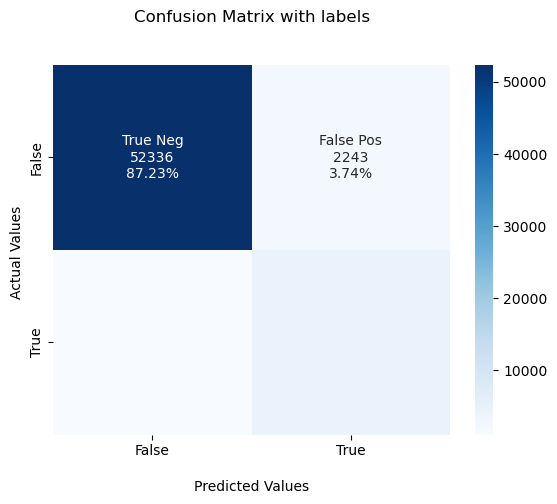

In [63]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

### 2.1.3 Performance Measure: Precision, Recall and F1 Score

The confusion matrix gives us a lot of information, but sometimes we may prefer a more concise metric. The following shows three measures that we can extract from the confusion matrix:

* **precision** is the accuracy of the positive predictions. In Scikit-Learn, this is implemented by the function [precision_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html). A high precision is desired. It is high if most samples that the model predicts as positive are indeed positive. 
  <br><br> <center>$precision = \frac{TP}{TP+FP}$</center>
  
* **recall** is the ratio of positive instances that are correctly detected by the classifier. In Scikit-Learn, this is implemented by the function [recall_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html). A high recall is desirable. It is high if most of the positive samples in the dataset are identified as positive by our model.
  <br><br> <center>$recall = \frac{TP}{TP+FN}$</center>
  
* **f1** combines precision and recall into a single metric. It is the *harmonic mean* of the two measures. In Scikit-Learn, this is implemented by the function [f1_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html). A high f1 score is desirable. F1 score is high only if both recall and precision are high. It will be low when either one of the two measures is low.
  <br><br> <center>$F_1 = \frac{TP}{TP + \frac{FN+FP}{2}}$ </center>

The following code compute the precision, recall and f1 score.

Ans: 
```
precision = 0.6604
recall    = 0.8045
f1 score  = 0.7253
```

In [64]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Exercise: compute and print the precision, recall and f1 score
print(f'precision = {precision_score(y_train_5, y_pred_cv):.4f}')
print(f'recall = {recall_score(y_train_5, y_pred_cv):.4f}')
print(f'f1 score = {f1_score(y_train_5, y_pred_cv):.4f}')

precision = 0.6604
recall = 0.8045
f1 score = 0.7253


### 2.1.4 Performance Measure: Precision-Recall curve (When dataset not balance)

Given an input, some machine learning algorithms not only can predict the label but also computes a *score* value that indicates its confidence in classifying the image as a positive sample. 

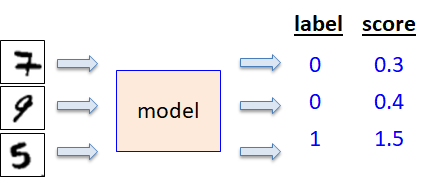

Thus, we can set some threshold on the score to control the precision and recall of our model.

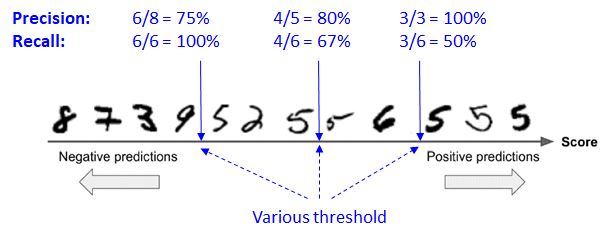

Unfortunately, for most cases, increasing precision reduces recall and vice versas. This is called the **precision/recall tradeoff**. 

In the following, we shall plot **precision-recall** performance on our training set to show the trade-off between these two measures as we adjust the threshold value. nce we have precision-recall graph, we can use it to decide on a suitable threshold value to be used for our final model.

#### Generating prediction scores

For SGDClassifier, we can retrieve the classification score of an input image through the function `decision_function`.  

In [65]:
def peek_scores(actual, scores, num = 20):
    print('actual |  score')
    print('------------------')
    for i in range(num):
        sel = np.random.randint(0, len(y_train))
        print(actual[sel], ' |', scores[sel])

y_scores = sgd_clf.decision_function(X_train) # retrieve classification scores

In [99]:
peek_scores(y_train_5, y_scores)

actual |  score
------------------
False  | -312888.8639421088
False  | -714581.5605955672
False  | -528406.3905783934
False  | -161793.01312532794
False  | -433964.61502433027
False  | -655563.6236588905
False  | -993144.9445270542
False  | -553770.9931185974
False  | -668488.4174289827
False  | -23305.642735408157
False  | -61753.31199676579
False  | -349923.83748022
False  | -415001.5952136388
False  | -189405.39721962772
False  | -278997.45566499897
False  | -535617.344767615
False  | -87017.7480912274
False  | -958907.9204837997
False  | -60464.70306450318
False  | -121309.22414264751


We can also retrieve the cross-validated scores for all samples through the function `cross_val_predict` with the parameter `method="decision_function"`. For each sample, the scores generated by different folds are combined and returned.

In [101]:
# Exercise: retrieve the average cross-validated prediction score values for all samples 
# y_scores_cv = (code here)
y_scores_cv = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method = 'decision_function')
y_scores_cv

array([  71310.55527761, -387500.63283774, -920073.77996782, ...,
        427605.84193656, -151452.95935099,   21486.8065185 ])

**Plot precision and recall graph**

To generate the precision-recall graphs, we need to compute the precision and scores with different threshold values. The Scikit-Learn library [precision_recall_curve](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html) which will automatically compute precision-recall pairs for different threshold values.

In [102]:
from sklearn.metrics import precision_recall_curve

# Exercise: compute precision-recall pairs for different threshold values 
# precisions, recalls, thresholds = (code here)
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores_cv)

Using the precision and recall values at different thresholds, we can now plot our precision-recall graph.

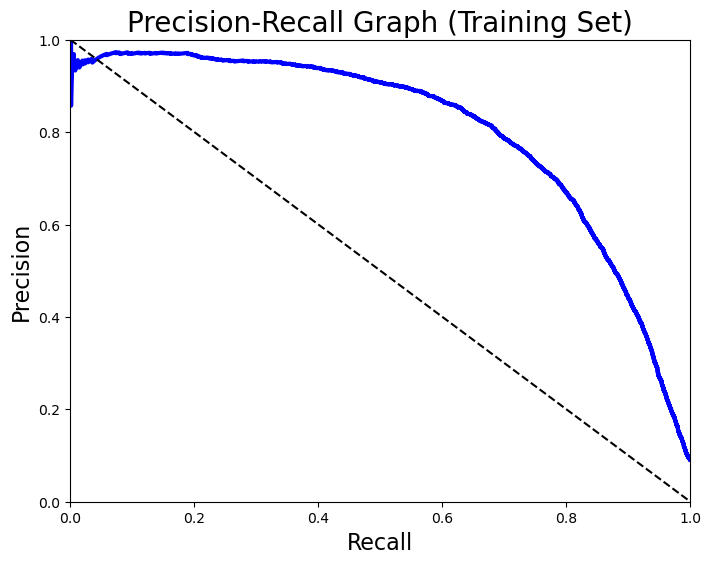

In [103]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=3)
    plt.plot(np.linspace(0, 1, 20), np.linspace(1, 0, 20), 'k--')
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.title ('Precision-Recall Graph (Training Set)', fontsize = 20)
plt.show()

#### Interpreting the P-R curve
The dotted line represents the P-R curve of a purely random classifier; a good classifier stays as far away from that line as possible (towards the top-right corner). Focus on positive class

### 2.1.5 Performance measure: ROC curve

The *receiver operating characteristic* (ROC) curve is another common tool used with binary classifiers. It is very similar to the precision/recall curve, but instead of plotting precision vs recall, the ROC curve plots the *true positive rate* (TPR, another name for recall) against the *false positive rate* (FPR). 

**TPR** or **recall** 
* the ratio of the correctly predicted positive samples $TPR = \frac{TP}{TP+FN}$. 
* A high TPR is desired. 
* It is high when the model is able to identify positive samples from all the positive samples in the dataset.

**FPR**
* the ratio of negative instances that are incorrectly classified as positive or $FPR = \frac{FP}{TN+FP}$. 
* A low FPR is desired. 
* It is low when the model make less mistakes identifying negative samples as positive ones. 

#### Plot ROC graph (If dataset balance)

To generate the precision-recall graphs, we need to compute the FPR and TPR values for different threshold values. The Scikit-Learn library [roc_curve](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) which will automatically compute FPR-TPR pairs for different threshold values.

In [107]:
from sklearn.metrics import roc_curve

# Exercise: compute FPR-TPR pairs 
# fpr, tpr, thresholds = (code here)
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores_cv)

Using the FPR and TPR values at different thresholds, we can now plot our precision-recall graph.

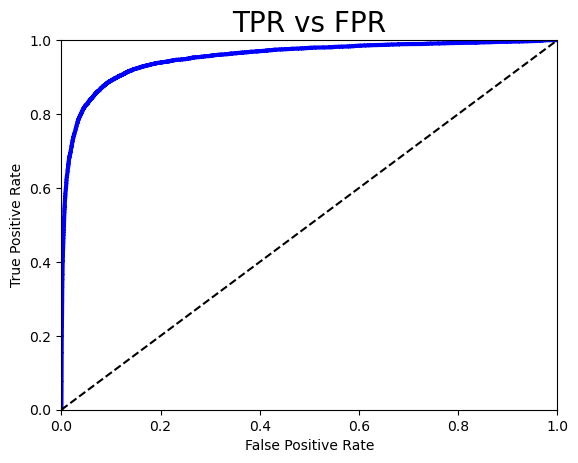

In [108]:
def plot_roc_curve (fpr, tpr, style = 'b-', label = None):
    plt.plot(fpr, tpr, style, linewidth = 3, label = label)
    plt.plot([0,1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel ('False Positive Rate')
    plt.ylabel ('True Positive Rate')
    plt.title('TPR vs FPR', fontsize=20)
    
plot_roc_curve(fpr, tpr)

#### Interpreting the ROC curve

The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (towards the top-left corner).

#### The AUC (Area under curve) measure

One way to compare classifiers is to measure the *area under the curve* (AUC) measure. A perfect classifier will have a ROC AUC equal to 1 whereas a purely random classifier ROC AUC equal to 0.5. Scikit-learn provides the function [roc_auc_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) to compute the ROC AUC: 

In [109]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_train_5, y_scores_cv)

print('AUC = {:.4f}'.format(auc))

AUC = 0.9537


## 2.2 Evaluate model on test set

The final model should be evaluated on unseen data (test set) before deployment. You should see that the test performance resutls are close to the training results, indicating that the model is not overfitted.


In [111]:
# Exercise: create a SGDClassifier(random_state = 42, max_iter = 5, tol = None) 
sgd_clf = SGDClassifier(random_state = 42, max_iter = 5, tol = None)

# Train using the training set
sgd_clf.fit(X_train, y_train_5)

# Use the trained classifier to predict on test set
y_pred_test = sgd_clf.predict(X_test)

# compute and print the precision, recall, f1 score of the prediction
print(f'precision = {precision_score(y_test_5, y_pred_test):.4f}')
print(f'recall = {recall_score(y_test_5, y_pred_test):.4f}')
print(f'f1 score = {f1_score(y_test_5, y_pred_test):.4f}')

precision = 0.8896
recall = 0.7500
f1 score = 0.8139


## 3. Exercise: Comparing Classifiers

### SGDClassifier vs RandomForestClassifier

#### [Precision and recall performance using 3 fold cross-validation]

**Q1.** Create and evaluate the performance of SGDClassifier in terms of **validation** *precision*, *recall* and *f1* metric using 3-fold cross-validation. For the SGDClassifier, set the maximum iteration to 200 and random_state to 42. 

Hints: Use [cross_validate](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) to evaluate the model. *cross_validate* function differs from *cross_val_score* where it allows specifying multiple metrics for evaluation and it can return both validation scores and training scores.

Ans (your ans may differ slightly):
```
SGDClassifier: validation accuracy  = 0.9570
SGDClassifier: validation recall    = 0.6512
SGDClassifier: validation precision = 0.8665
SGDClassifier: validation f1        = 0.7232
```

In [112]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter = 200, random_state = 42)
sgd_result = cross_validate (sgd_clf, X_train, y_train_5, cv=3, scoring=['accuracy', 'precision', 'recall', 'f1'])

print('SGDClassifier: validation accuracy  = {:.4f}'.format(sgd_result['test_accuracy'].mean()))
print('SGDClassifier: validation recall    = {:.4f}'.format(sgd_result['test_recall'].mean()))
print('SGDClassifier: validation precision = {:.4f}'.format(sgd_result['test_precision'].mean()))
print('SGDClassifier: validation f1        = {:.4f}'.format(sgd_result['test_f1'].mean()))

SGDClassifier: validation accuracy  = 0.9570
SGDClassifier: validation recall    = 0.6512
SGDClassifier: validation precision = 0.8665
SGDClassifier: validation f1        = 0.7232


**Q2.** Create and evaluate the performance of [RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) classifier to classify digit-5 images. 

Create a random forest classifier (n_estimators = 10, random_state = 42). Then evaluate the performance of your system in terms of precision and recall metric on the training set using 3-fold cross-validation. 

Ans (your answer may differ slightly):
```
Forest: validation accuracy  = 0.9828
Forest: validation recall    = 0.8213
Forest: validation precision = 0.9861
Forest: validation f1        = 0.8961
```

In [113]:
# Your code here
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 10, random_state = 42)
rfc_result = cross_validate(rfc, X_train, y_train_5, cv=3,scoring=['accuracy', 'precision', 'recall', 'f1'])

print('Forest: validation accuracy  = {:.4f}'.format(rfc_result['test_accuracy'].mean()))
print('Forest: validation recall    = {:.4f}'.format(rfc_result['test_recall'].mean()))
print('Forest: validation precision = {:.4f}'.format(rfc_result['test_precision'].mean()))
print('Forest: validation f1        = {:.4f}'.format(rfc_result['test_f1'].mean()))


Forest: validation accuracy  = 0.9828
Forest: validation recall    = 0.8213
Forest: validation precision = 0.9861
Forest: validation f1        = 0.8961


**Analysis**: From the above results, we can see that *SGDClassifier* performs not as good, this is because it is a linear classifier and thus suffer from *underfitting*. The performance of *Random Forest* is the better since it is able to model non-linear data quite well.

#### [Comparing classifiers using the ROC curve]

**Q3.** Compute the classification scores for the two classifiers

First, compute the cross-validated classification scores for all models. Use the function *cross_val_predict* to compute the averaged scores for all samples. Use 3 fold cross-validation (`cv=3`). Set the parameter `method` as follows:
* *SGDCLassifier*: `decision_function` 
* *RandomForestClassifier*: `predict_proba` 

Save your result into `y_scores_sgd` and `y_scores_forest` respectively.

In [115]:
# Your code here
y_scores_sgd = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method = 'decision_function')
y_scores_forest = cross_val_predict(rfc, X_train, y_train_5, cv=3, method = 'predict_proba')

**Note:** *SGDClassifier* returns a vector of size (N,) which stores the probability of each image belonging to the digit-5 (positive samples). On the other hand, *RandomForestClassifier* returns a matrix of size `(N,2)` where the first column is the probability that the data belong to class 0 (non digit-5), and the second column refers to the probability that the data belong to class 1 (digit-5).

In [116]:
print('Shape of y_scores_sgd:', y_scores_sgd.shape)
print('Shape of y_scores_forest:', y_scores_forest.shape)

Shape of y_scores_sgd: (60000,)
Shape of y_scores_forest: (60000, 2)


To make the scores consistent we only retain the second column of `RandomForestClassifier`.

In [117]:
y_scores_forest = y_scores_forest[:, 1]

**Q4.** Plot the ROC curves for all three classifiers.

First, we get the FPR, TPR and the thresholds of the classifiers by calling *roc_curve* function (Refer to the above example to see how to do it). 

In [118]:
# Compute the FPR, TPR and the thresholds of the twp classifiers using roc_curve

fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y_train_5, y_scores_sgd)
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

Then, plot the ROC curve for the classifiers. You may invoke the function *plot_roc_curve* that we have defined above to do this.

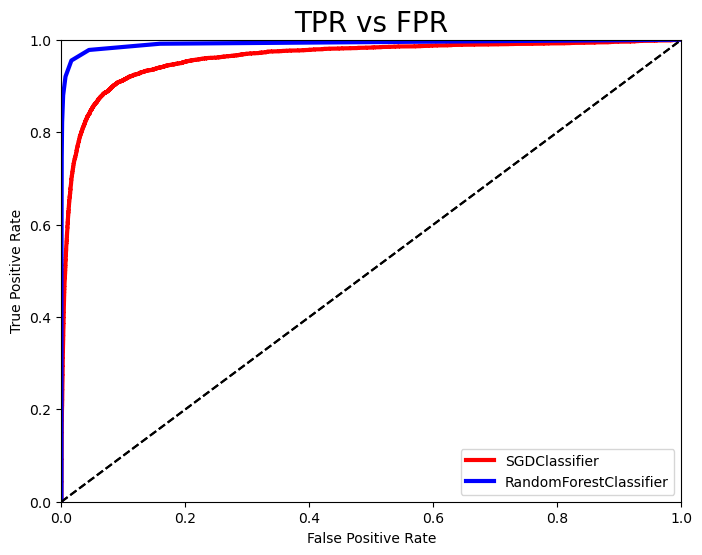

In [119]:
plt.figure(figsize = (8, 6))
plot_roc_curve(fpr_sgd, tpr_sgd, 'r-', 'SGDClassifier')
plot_roc_curve(fpr_forest, tpr_forest, 'b-', 'RandomForestClassifier')
plt.legend (loc='lower right')
plt.show()

**Q5.** Compute and show the AUC measures for the classifiers.

Ans (your answer may differ slightly):
```
AUC for SGDClassifir = 0.9605
AUC for RandomForestClassifier = 0.9921
```

*RandomForestClassifier* should have a higher AUC than *SGDClassifier*.

In [124]:
from sklearn.metrics import roc_auc_score
sdg_auc = roc_auc_score(y_train_5, y_scores_sgd)
rfc_auc = roc_auc_score(y_train_5, y_scores_forest)

print('AUC for SGDClassifier =%.4f' % (sdg_auc))
print('AUC for RandomForestClassifier =%.4f' % (rfc_auc))

AUC for SGDClassifier =0.9605
AUC for RandomForestClassifier =0.9921


**---- End ----**